# EEE511 Assignment: Team 7
# Linear Regression with MSE and Huber Loss

### Loading Data

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


Dataset loaded: 27 samples
X range: [0.037, 0.986]
Y range: [0.307, 1.158]

X range: [0.037, 0.986]
Y range: [0.307, 1.158]


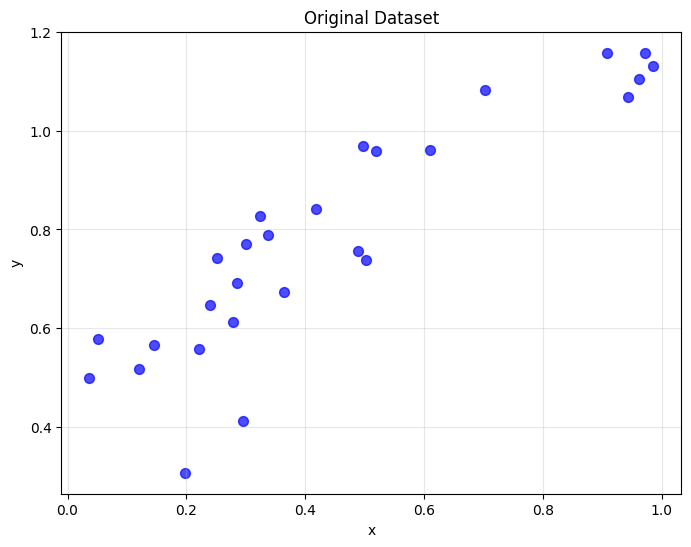

In [ ]:
data = pd.read_csv('data.csv')
X = data['x'].values
y = data['y'].values

print(f"Dataset loaded: {len(X)} samples")
print(f"X range: [{X.min():.3f}, {X.max():.3f}]")
print(f"Y range: [{y.min():.3f}, {y.max():.3f}]")

plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, color='blue', s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Dataset')
plt.grid(True, alpha=0.3)
plt.show()

### LOSS FUNCTION IMPLEMENTATIONS

In [ ]:
def mse_loss_and_gradients(X, y, w, b):
    y_pred = w * X + b
    residuals = y - y_pred
    loss = np.mean(residuals**2) / 2
    grad_w = -np.mean(X * residuals)
    grad_b = -np.mean(residuals)
    return loss, grad_w, grad_b

def huber_loss_and_gradients(X, y, w, b, delta=1.0):
    y_pred = w * X + b
    residuals = y - y_pred
    abs_residuals = np.abs(residuals)
    small_residuals = abs_residuals <= delta
    
    loss_quad = residuals**2 / 2
    loss_linear = delta * abs_residuals - delta**2 / 2
    loss = np.mean(np.where(small_residuals, loss_quad, loss_linear))
    
    grad_residuals = np.where(small_residuals, residuals, delta * np.sign(residuals))
    grad_w = -np.mean(X * grad_residuals) 
    grad_b = -np.mean(grad_residuals)
    
    return loss, grad_w, grad_b

print("Loss functions defined successfully!")

 Loss functions with gradients defined successfully!


### EXPERIMENTAL SETUP AND EXECUTION

In [ ]:
learning_rates = [0.01, 0.1, 0.5]  
loss_types = ['mse', 'huber']     
termination_criteria = ['loss', 'params']  

all_results = {}

print("Starting experiments...")
print("=" * 60)
print("Total experiments: 2 loss × 3 learning rates × 2 criteria = 12 experiments")
print("=" * 60)

for loss_type in loss_types:
    for lr in learning_rates:
        for criterion in termination_criteria:
            
            w = 0.0
            b = 0.0
            loss_history = []
            
            exp_name = f"{loss_type.upper()}_LR{lr}_{criterion}"
            print(f"Running experiment: {exp_name}")
            
            prev_loss = float('inf')
            prev_w, prev_b = w, b
            
            for iteration in range(10000):
                
                if loss_type == 'mse':
                    current_loss, grad_w, grad_b = mse_loss_and_gradients(X, y, w, b)
                else:
                    current_loss, grad_w, grad_b = huber_loss_and_gradients(X, y, w, b, delta=0.1)
                
                loss_history.append(current_loss)
                
                if iteration > 0:
                    if criterion == 'loss':
                        if abs(prev_loss - current_loss) < 1e-6:
                            break
                    else:  
                        param_change = np.sqrt((w - prev_w)**2 + (b - prev_b)**2)
                        if param_change < 1e-6:
                            break
                
                prev_loss = current_loss
                prev_w, prev_b = w, b
                w = w - lr * grad_w  
                b = b - lr * grad_b
            
            all_results[exp_name] = {
                'w': w,
                'b': b,
                'loss': current_loss,
                'iterations': iteration + 1,
                'loss_history': loss_history
            }
            
            print(f"Converged: w={w:.4f}, b={b:.4f}, Loss={current_loss:.6f}, Iterations={iteration+1}")

print("=" * 60)
print("All experiments completed successfully!")

 Starting experiments...
Total experiments: 2 loss × 3 learning rates × 2 criteria = 12 experiments
Running experiment: MSE_LR0.01_loss
 Converged: w=0.6020, b=0.5200, Loss=0.006280, Iterations=1695
Running experiment: MSE_LR0.01_params
 Converged: w=0.7321, b=0.4581, Loss=0.005553, Iterations=8398
Running experiment: MSE_LR0.1_loss
 Converged: w=0.6921, b=0.4771, Loss=0.005625, Iterations=338
Running experiment: MSE_LR0.1_params
 Converged: w=0.7332, b=0.4576, Loss=0.005553, Iterations=1174
Running experiment: MSE_LR0.5_loss
 Converged: w=0.7159, b=0.4658, Loss=0.005566, Iterations=92
Running experiment: MSE_LR0.5_params
 Converged: w=0.7334, b=0.4575, Loss=0.005553, Iterations=280
Running experiment: HUBER_LR0.01_loss
 Converged: w=0.5510, b=0.5577, Loss=0.004998, Iterations=2449
Running experiment: HUBER_LR0.01_params
 Converged: w=0.7321, b=0.4581, Loss=0.005553, Iterations=8398
Running experiment: MSE_LR0.1_loss
 Converged: w=0.6921, b=0.4771, Loss=0.005625, Iterations=338
Running

### RESULTS ANALYSIS AND SUMMARY

In [ ]:
print("RESULTS SUMMARY")
print("=" * 70)
print("Ground Truth: w = 0.67, b = 0.5 (known from dataset meta.csv)")
print("=" * 70)

print(f"{'Experiment':<20} {'Final w':<8} {'Final b':<8} {'Loss':<10} {'Iterations':<10}")
print("-" * 70)

for exp_name, result in all_results.items():
    print(f"{exp_name:<20} {result['w']:<8.4f} {result['b']:<8.4f} {result['loss']:<10.6f} {result['iterations']:<10}")

print("=" * 70)

mse_results = [r for name, r in all_results.items() if 'MSE' in name]
best_mse = min(mse_results, key=lambda x: abs(x['w'] - 0.67) + abs(x['b'] - 0.5))

huber_results = [r for name, r in all_results.items() if 'HUBER' in name]
best_huber = min(huber_results, key=lambda x: abs(x['w'] - 0.67) + abs(x['b'] - 0.5))

print(f"\nMODEL COMPARISON:")
print(f"Best MSE model:   w={best_mse['w']:.4f}, b={best_mse['b']:.4f}")
print(f"Best Huber model: w={best_huber['w']:.4f}, b={best_huber['b']:.4f}")
print(f"True parameters:  w=0.6700, b=0.5000")

mse_error = abs(best_mse['w'] - 0.67) + abs(best_mse['b'] - 0.5)
huber_error = abs(best_huber['w'] - 0.67) + abs(best_huber['b'] - 0.5)
print(f"\nParameter accuracy:")
print(f"MSE total error:   {mse_error:.6f}")
print(f"Huber total error: {huber_error:.6f}")

RESULTS SUMMARY
Ground Truth: w = 0.67, b = 0.5 (known from dataset meta.csv)
Experiment           Final w  Final b  Loss       Iterations
----------------------------------------------------------------------
MSE_LR0.01_loss      0.6020   0.5200   0.006280   1695      
MSE_LR0.01_params    0.7321   0.4581   0.005553   8398      
MSE_LR0.1_loss       0.6921   0.4771   0.005625   338       
MSE_LR0.1_params     0.7332   0.4576   0.005553   1174      
MSE_LR0.5_loss       0.7159   0.4658   0.005566   92        
MSE_LR0.5_params     0.7334   0.4575   0.005553   280       
HUBER_LR0.01_loss    0.5510   0.5577   0.004998   2449      
HUBER_LR0.01_params  0.6952   0.4864   0.004177   9816      
HUBER_LR0.1_loss     0.6518   0.5076   0.004255   434       
HUBER_LR0.1_params   0.6965   0.4858   0.004177   1346      
HUBER_LR0.5_loss     0.6771   0.4953   0.004192   113       
HUBER_LR0.5_params   0.6966   0.4857   0.004177   319       

 MODEL COMPARISON:
Best MSE model:   w=0.6921, b=0.4771
B

# VISUALIZATION 1: DATA WITH BEST MODEL FITS

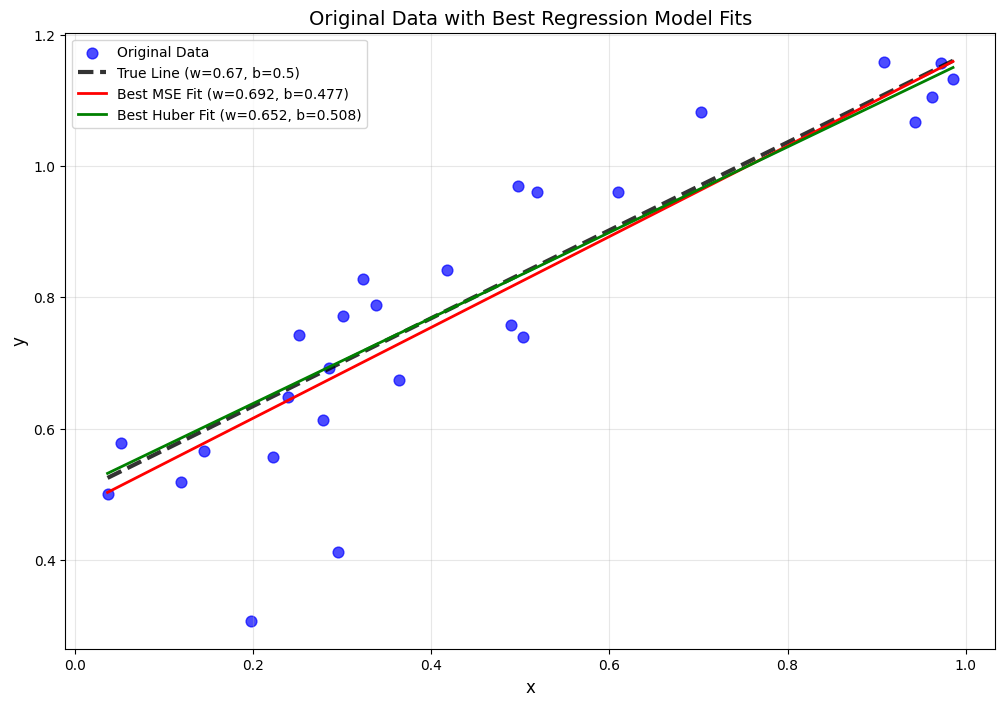

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(X, y, alpha=0.7, color='blue', s=60, label='Original Data')

x_line = np.linspace(X.min(), X.max(), 100)

plt.plot(x_line, 0.67 * x_line + 0.5, '--', color='black', linewidth=3, 
         label='True Line (w=0.67, b=0.5)', alpha=0.8)

mse_best = all_results['MSE_LR0.1_loss']
mse_line = mse_best['w'] * x_line + mse_best['b']
plt.plot(x_line, mse_line, color='red', linewidth=2, 
         label=f"Best MSE Fit (w={mse_best['w']:.3f}, b={mse_best['b']:.3f})")

huber_best = all_results['HUBER_LR0.1_loss']
huber_line = huber_best['w'] * x_line + huber_best['b']
plt.plot(x_line, huber_line, color='green', linewidth=2, 
         label=f"Best Huber Fit (w={huber_best['w']:.3f}, b={huber_best['b']:.3f})")

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Original Data with Best Regression Model Fits', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

### VISUALIZATION 2: LEARNING RATE COMPARISON

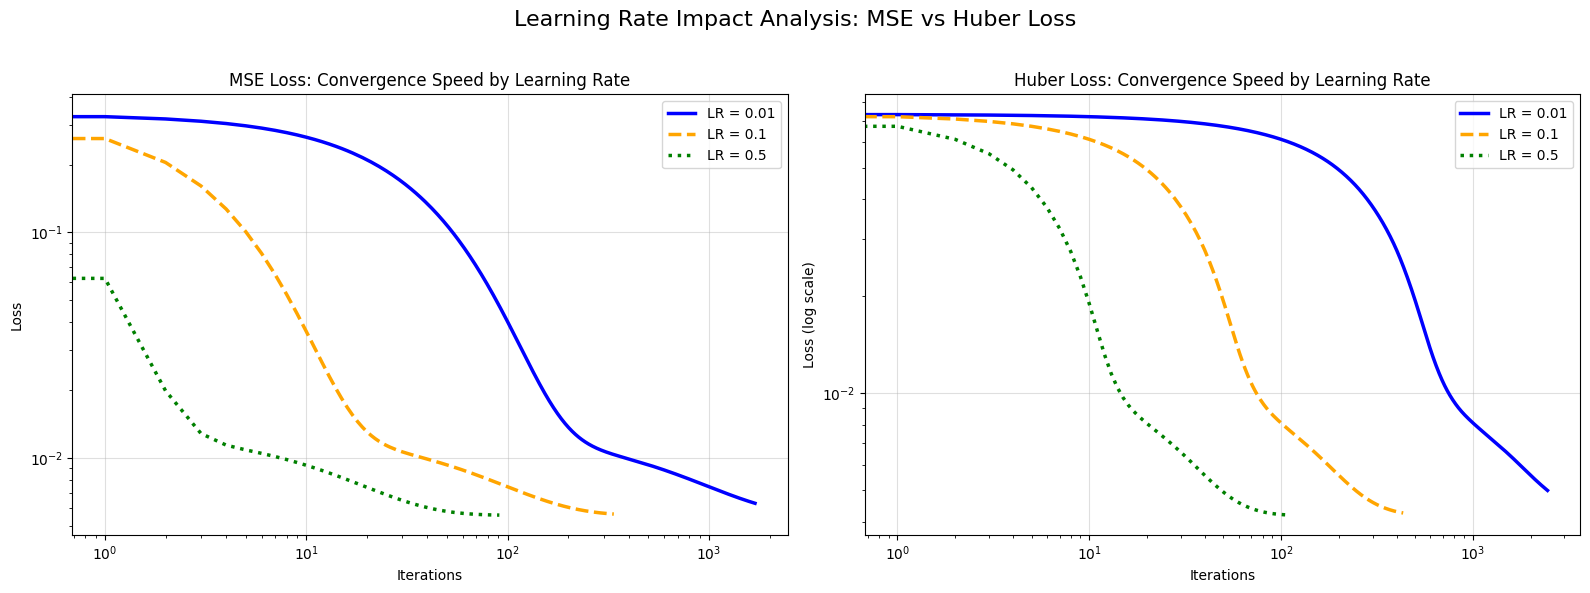

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Learning Rate Impact Analysis: MSE vs Huber Loss', fontsize=16)

learning_rates = [0.01, 0.1, 0.5]
colors = ['blue', 'orange', 'green']
line_styles = ['-', '--', ':']

ax1.set_title('MSE Loss: Convergence Speed by Learning Rate')
for i, lr in enumerate(learning_rates):
    exp_name = f"MSE_LR{lr}_loss"
    if exp_name in all_results:
        ax1.plot(all_results[exp_name]['loss_history'], 
                 label=f'LR = {lr}', 
                 color=colors[i],
                 linestyle=line_styles[i],
                 linewidth=2.5)

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend()
ax1.grid(True, alpha=0.4)

ax2.set_title('Huber Loss: Convergence Speed by Learning Rate')
for i, lr in enumerate(learning_rates):
    exp_name = f"HUBER_LR{lr}_loss"
    if exp_name in all_results:
        ax2.plot(all_results[exp_name]['loss_history'], 
                 label=f'LR = {lr}', 
                 color=colors[i],
                 linestyle=line_styles[i],
                 linewidth=2.5)

ax2.set_xlabel('Iterations')
ax2.set_ylabel('Loss (log scale)')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.legend()
ax2.grid(True, alpha=0.4)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()